# Data Analysis using Python

### Importing Libraries

In [342]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 150)
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np

In [343]:
df = pd.read_excel("C:\\Users\\anmol.parimoo\\Documents\\Python\\Learning\\Data Analysis using Python\\Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Q1. What is the overall sales trend for the current year?

In [344]:
#Getting Month-Year from Order Date
df['Month_Year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
#df.info()

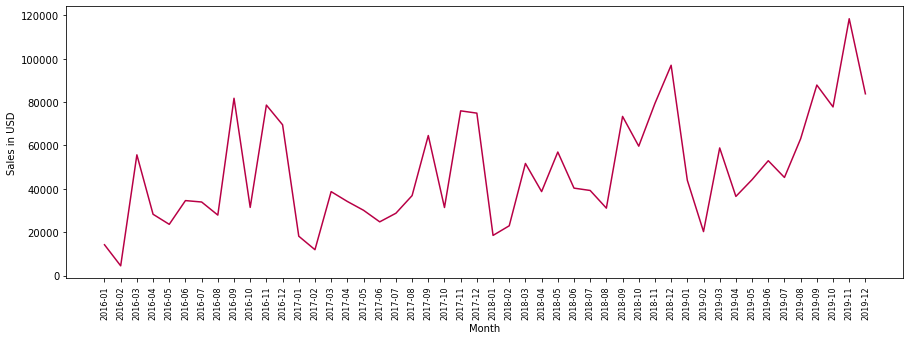

In [345]:
results = df.groupby('Month_Year').sum()
months = [month for month, df in df.groupby('Month_Year')]
plt.figure(figsize=(15,5))
plt.plot(months,results['Sales'], color = '#b80045')
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
#plt.grid()
plt.show()

### Q2. What is the MoM, QoQ and YoY Growth for each year?

#### Q2.a. MoM Growth

In [346]:
## MoM data will be used to calculate MoM calculations and act as a base for QoQ and YoY
MoM_Data = pd.DataFrame(results['Sales'])

In [347]:
MoM_Data['Last_Month'] = np.roll(MoM_Data['Sales'],1)
MoM_Data
#Now, since the MoM first month cannot be found since we donot have it's previous month value.
#By default, python has put the last value in the column and rolled up over there. SO we need to remove that.

MoM_Data = MoM_Data.drop(MoM_Data.index[0])

In [348]:
#Calculating MoM Growth for each month:
MoM_Data['Growth'] = (MoM_Data['Sales']/MoM_Data['Last_Month'])-1
MoM_Data.head()

,Sales,Last_Month,Growth
Month_Year,,,
2016-02,4519.8920,14236.895,-0.682523
2016-03,55691.0090,4519.892,11.321314
2016-04,28295.3450,55691.009,-0.491923
2016-05,23648.2870,28295.345,-0.164234
2016-06,34595.1276,23648.287,0.462902


In [349]:
##Plotting MoM Growth
results = MoM_Data.drop(columns = ["Sales", "Last_Month"])
results['Months'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Months
0,-0.682523,2016-02
1,11.321314,2016-03
2,-0.491923,2016-04
3,-0.164234,2016-05
4,0.462902,2016-06


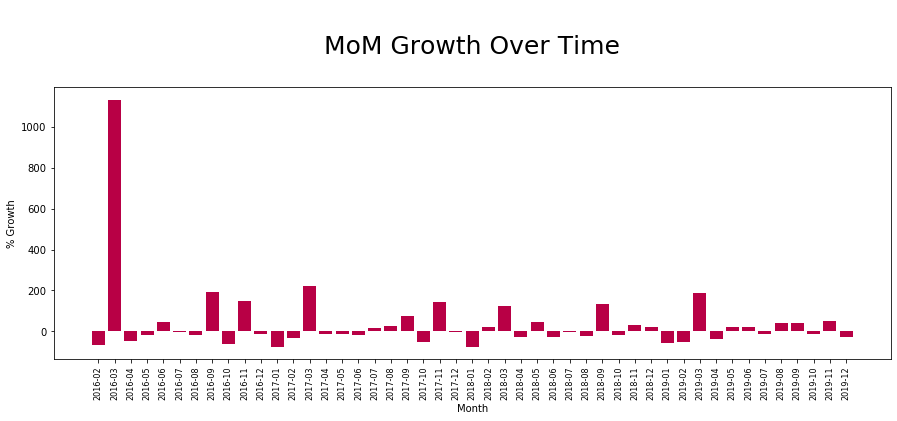

In [350]:
plt.figure(figsize=(15,5))
plt.bar(results['Months'],results['Growth']*100, color = '#b80045')
plt.xticks(results['Months'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n MoM Growth Over Time \n", size=25)
#plt.grid()
plt.show()

#### Q2.b. QoQ Growth

In [351]:
df['Qtr'] = df['Order Date'].apply(lambda x: x.strftime('%m'))
df['Qtr'] = pd.to_numeric(df['Qtr'])//4+1
df['Year'] = df['Order Date'].apply(lambda x: x.strftime('%Y'))
df['Qtr_Yr'] = df['Year'].astype(str) + '-Q' + df['Qtr'].astype(str)
df.drop('Qtr', axis=1)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_Year,Qtr,Year,Qtr_Yr
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2018-11,3,2018,2018-Q3
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2018-11,3,2018,2018-Q3
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2018-06,2,2018,2018-Q2
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2017-10,3,2017,2017-Q3
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2017-10,3,2017,2017-Q3


In [352]:
results = df.groupby('Qtr_Yr').sum()
#results.head()

In [353]:
QoQ_Data = pd.DataFrame(results['Sales'])

QoQ_Data['Last_Qtr'] = np.roll(QoQ_Data['Sales'],1)
QoQ_Data
#Now, since the MoM first month cannot be found since we donot have it's previous month value.
#By default, python has put the last value in the column and rolled up over there. SO we need to remove that.

QoQ_Data = QoQ_Data.drop(QoQ_Data.index[0])

In [354]:
#Calculating QoQ Growth for each Qtr:
QoQ_Data['Growth'] = (QoQ_Data['Sales']/QoQ_Data['Last_Qtr'])-1
QoQ_Data.head()

,Sales,Last_Qtr,Growth
Qtr_Yr,,,
2016-Q2,120485.1526,74447.7960,0.618384
2016-Q3,219768.9290,120485.1526,0.824033
2016-Q4,69545.6205,219768.9290,-0.683551
2017-Q1,68851.7386,69545.6205,-0.009977
2017-Q2,117889.5120,68851.7386,0.712223


In [355]:
##Plotting QoQ Growth
results = QoQ_Data.drop(columns = ["Sales", "Last_Qtr"])
results['Quarter'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Quarter
0,0.618384,2016-Q2
1,0.824033,2016-Q3
2,-0.683551,2016-Q4
3,-0.009977,2017-Q1
4,0.712223,2017-Q2


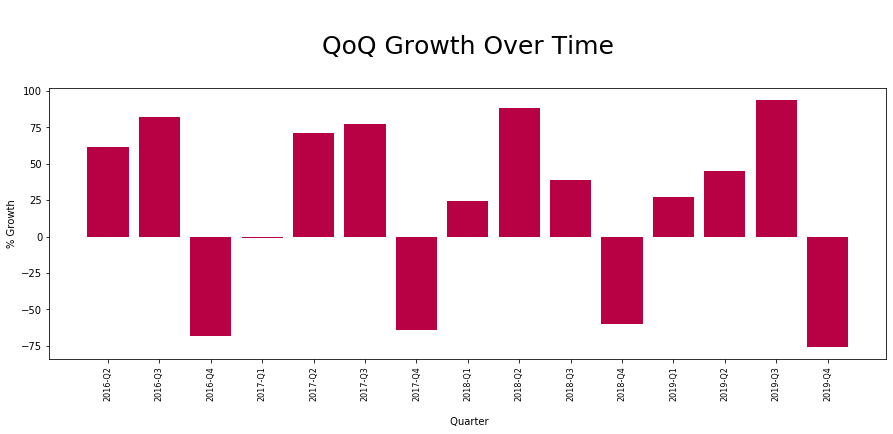

In [356]:
plt.figure(figsize=(15,5))
plt.bar(results['Quarter'],results['Growth']*100, color = '#b80045')
plt.xticks(results['Quarter'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('\n Quarter')
plt.title("\n QoQ Growth Over Time \n", size=25)
#plt.grid()
plt.show()

#### Q2.c. YoY Growth by month

In [357]:
#Creating sales grouped by Month-Year again
YoY_Data = pd.DataFrame(df.groupby('Month_Year').sum()['Sales'])
YoY_Data['Last_Year'] = np.roll(YoY_Data['Sales'],12)
#YoY_Data

In [358]:
YoY_Data = YoY_Data.drop(YoY_Data.index[0:12])
YoY_Data.head()

,Sales,Last_Year
Month_Year,,
2017-01,18174.0756,14236.895
2017-02,11951.4110,4519.892
2017-03,38726.2520,55691.009
2017-04,34195.2085,28295.345
2017-05,30131.6865,23648.287


In [359]:
#Calculating YoY Growth for each month:
YoY_Data['Growth'] = (YoY_Data['Sales']/YoY_Data['Last_Year'])-1
YoY_Data.head()

,Sales,Last_Year,Growth
Month_Year,,,
2017-01,18174.0756,14236.895,0.276548
2017-02,11951.4110,4519.892,1.644181
2017-03,38726.2520,55691.009,-0.304623
2017-04,34195.2085,28295.345,0.208510
2017-05,30131.6865,23648.287,0.274159


In [360]:
##Plotting YoY Growth
results = YoY_Data.drop(columns = ["Sales", "Last_Year"])
results['Month_Year'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Month_Year
0,0.276548,2017-01
1,1.644181,2017-02
2,-0.304623,2017-03
3,0.208510,2017-04
4,0.274159,2017-05


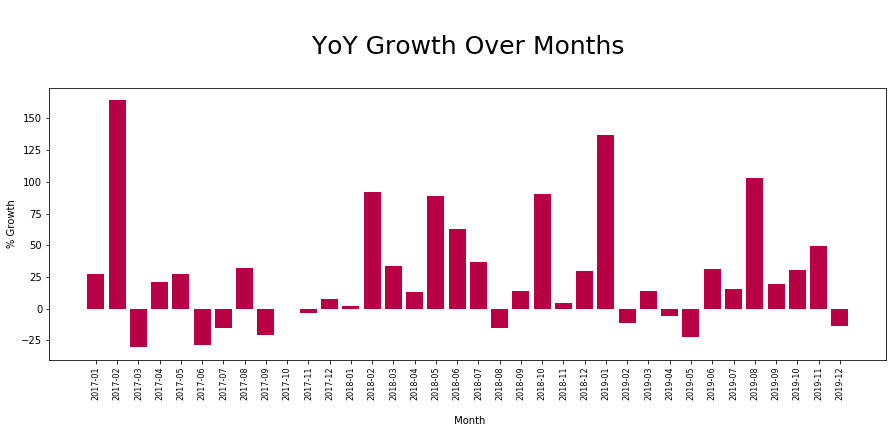

In [361]:
plt.figure(figsize=(15,5))
plt.bar(results['Month_Year'],results['Growth']*100, color = '#b80045')
plt.xticks(results['Month_Year'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('\n Month')
plt.title("\n YoY Growth Over Months \n", size=25)
#plt.grid()
plt.show()

### Q3. Which are the Top 10 products by sales?

In [362]:
prod_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

#Calculating Top 10:
top_prods = prod_sales.head(10)
top_prods

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


### Q4. Which are the most selling products?

In [363]:
best_selling_prods = pd.DataFrame(df.groupby('Product Name').sum()['Quantity'])
best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)

#Calculating Top 5:
best_selling_prods = best_selling_prods.head(5)
best_selling_prods

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74


### Q5. Which are the most profitable products?

In [364]:
profitable_prods = pd.DataFrame(df.groupby('Product Name').sum()['Profit'])
profitable_prods.sort_values(by=['Profit'], inplace=True, ascending=False)

#Calculating Top 5:
profitable_prods = profitable_prods.head(5)
profitable_prods

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
